In [19]:
#Mount your personal Google Drive to colab
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive')
os.chdir('MyDrive')

Mounted at /content/drive


In [20]:
os.getcwd() #Get current working directory
os.listdir() #list content of current directory

['How to get started with Drive.pdf',
 'CV.gdoc',
 'CV Albin Svensson.pdf',
 'ldldldld.gdoc',
 'Följesedel.pdf',
 'springshred.pdf',
 'Copy of CV Albin Svensson.gdoc',
 'CV Albin Svensson.gdoc',
 'Bänkpress boogie 2gV.gsheet',
 'Untitled document (3).gdoc',
 'Golfbidder Quotation TX572774.pdf',
 'Lösningar Fysik 1 Kapitel 3.pdf',
 'Lösningar Fysik 1 Kapitel 3.gdoc',
 'basfysik1_deltentamen1_20201219 A.pdf',
 'basfysik1_deltentamen1_210116_A.pdf',
 'basfysik1_deltentamen1_20201116.pdf',
 'Kraftuppgifter.pdf',
 'Lösningsförslag Tentamen20210116.pdf',
 'Lösningsförslag 20201116_2.pdf',
 'Lösningsförslag 20201219.pdf',
 'Lab 13.gdoc',
 'Lab 12.gdoc',
 'Lab 10.gdoc',
 'Beredning av lösningar 12.gdoc',
 '2021.gsheet',
 '2022.gsheet',
 'Elektrolys av kopparklorid 26.gdoc',
 'Lab 5 rörelse.gdoc',
 'Heureka Fysik. Kurs 2.pdf',
 'Matematik 5000. Kurs 4.pdf',
 'Labb 1 kaströrelse - Line chart 1 (2).gsheet',
 'Labb 1 kaströrelse - Line chart 1 (1).gsheet',
 'Labb 1 kaströrelse - Lin

In [21]:
if not os.path.isdir("AI_for_IA"): # create subfolder AI_for_IA if it does
  os.mkdir("AI_for_IA") # not already exist
os.chdir("AI_for_IA") # move into the new subfolder => current working directory
os.getcwd() # check which is the current working directory

'/content/drive/MyDrive/AI_for_IA'

In [22]:
#Imports needed for the entire assignments

import numpy as np
import matplotlib.pyplot as plt
import torch

## Task B: Gradient Descent based on NumPy and Manual Differentiation

**Exercise B.1 - Step size:**

The paramater n is just a scalar multiplier and not the actual distance moved between steps. The true step size is the distance between the old point and the new point. Witch can be calulated using $||x_t+1 - x_t||$

**Exercise B.2 - Stopping Criteria:**

**1. Maximum number of iterations**:

The algorithm stops after a fixed number of steps.

Pros: This garantees that the algorithm is not stuck in a infinite loop.

Cons: If the limit is to small the algorithm will stop before founding a minimum.

**2. Gradient Magnitude Threshold**:

The algorithm stops when the gradient's magnitude (norm) is below a small threshold.

Pros: This is a good method since the gradient is zero at the minimum.

Cons: The algorithm might stop prematurely far from the true minimum if a flat plataeu is found.

**Informing on Non-Convergence:**

The first criterion that stops after a fixed number of steps will inform you of non-convergence. If the algorithm stops only beacuse it hit the limit number of steps, it means it failed to find a minimum.

**Discovering Divergence:**

You can discover divergence by monitoring the function value $f(x_t)$. If it rapidly is increasing at each step, the algorithm is moving away from the minimum.


**Exercise B.3**

In [ ]:
#A) Psudocode for algorithm 3 with the current function and gradient

#First we need the derivative of f(x) which is 2 * (x - 3.14) * exp(-(x - 3.14)^2), this is the gradient.

#setting starting values
set x = (some starting value)
set step_lenght = (chosen step lenght)
set max_iterations = (some value)
set stopping_threshold = (some value)

#for loop that terminates after max iterations
for t=0 to max_iterations:

    set gradient = 2 * (x - 3.14) * exp(-(x - 3.14)^2)

  #if gradient is less then the set threshhold we found minimum and end if statement
  if ABS(gradient) < stopping_threshold
    Break
  End if

  set x = x - step_lenght* gradient

end for

print(x)


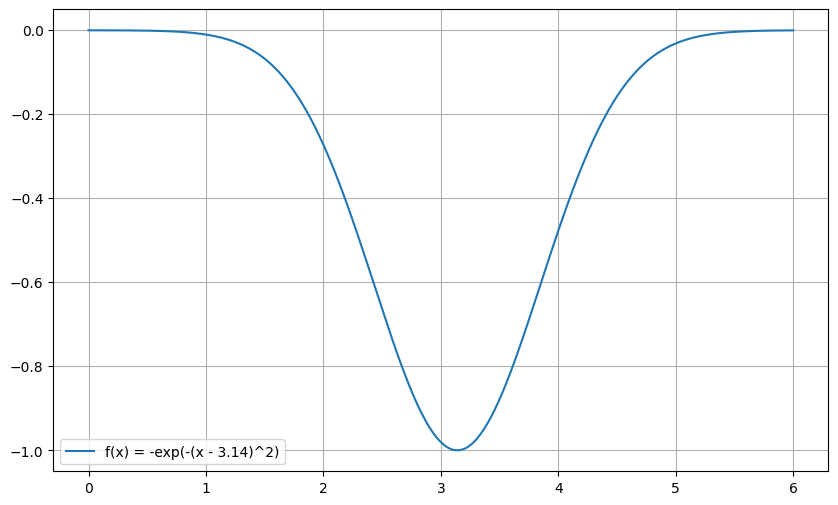

In [25]:
#B) Plot the function

def f(x):
  return -np.exp(-(x - 3.14)**2)

x = np.linspace(0, 6, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = -exp(-(x - 3.14)^2)')
plt.legend()
plt.grid(True)
plt.show()

The minimum is at 3.14, which we can see from the plot. We could have found the minimum just by looking at the function $f(x) = -e^{-(x-3.14)^{2}}$.

The minimum value of $f(x)$ occurs when the term $e^{-(x-3.14)^{2}}$ is at its maximum.

This happens when the function's exponent, $-(x-3.14)^2$, is maximized.

Since the term $(x-3.14)^2$ has a minimum value of $0$ (at $x=3.14$), the exponent $-(x-3.14)^2$ must have a maximum value of $0$.

Therefore, the minimum of $f(x)$ is at $x=3.14$, and the value is $-e^0 = -1$. This is within the range [0, 6].

In [26]:
#C) Gradient decent algorithm using Python

def f(x):
  return -np.exp(-(x - 3.14)**2)

def grad_f(x):
  return 2 * (x - 3.14) * np.exp(-(x - 3.14)**2)

x_current = 1               #Starting guess
step_length = 0.1           # Step length parameter
max_iterations = 1000       # Max steps to avoid infinite loop
stopping_threshold = 1e-7   # Stop if gradient is near zero

for i in range(max_iterations):

    # Calculate the gradient at the current position
    gradient = grad_f(x_current)

    #stopping criterion
    if np.abs(gradient) < stopping_threshold:
        break

    x_current = x_current - step_length * gradient

print(f"Minimum found at x = {x_current}")

Minimum found at x = 3.1399999524477566


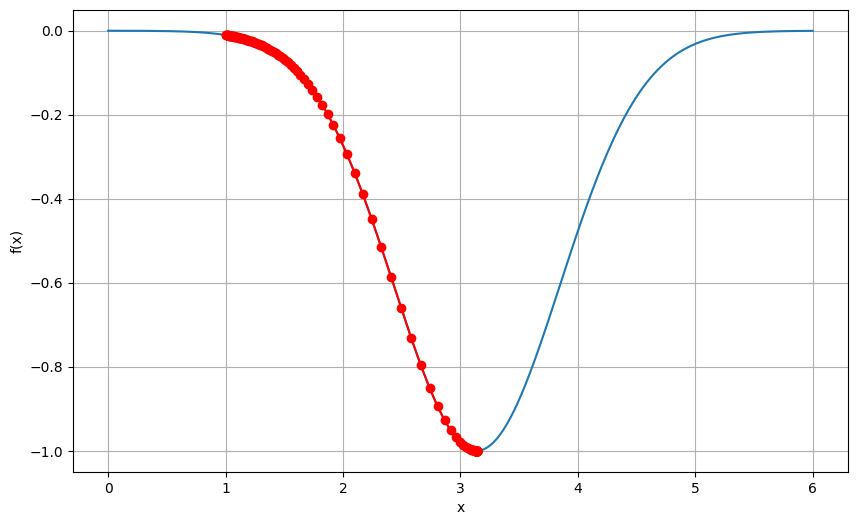

Minimum found at x = 3.1399999524477566
Value of the minimum f(x) = -0.9999999999999978


In [27]:
#D) Plot the trajectory of the gradient descent

def f(x):
  return -np.exp(-(x - 3.14)**2)

def grad_f(x):
  return 2 * (x - 3.14) * np.exp(-(x - 3.14)**2)

x = np.linspace(0, 6, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = -exp(-(x - 3.14)^2)')

# Gradient Descent with trajectory tracking
x_current = 1               #Starting guess
step_length = 0.1           # Step length parameter
max_iterations = 1000       # Max steps to avoid infinite loop
stopping_threshold = 1e-7   # Stop if gradient is near zero

trajectory_x = []
trajectory_fx = []

for i in range(max_iterations):
    trajectory_x.append(x_current)
    trajectory_fx.append(f(x_current))

    # Calculate the gradient at the current position
    gradient = grad_f(x_current)

    #stopping criterion
    if np.abs(gradient) < stopping_threshold:
        break

    x_current = x_current - step_length * gradient

# Append the final point after the loop breaks
trajectory_x.append(x_current)
trajectory_fx.append(f(x_current))


# Plot the trajectory
plt.plot(trajectory_x, trajectory_fx, 'ro-',)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

print(f"Minimum found at x = {x_current}")
print(f"Value of the minimum f(x) = {f(x_current)}")

E) The key difference is in the update step. Instead of subtracting the gradient from the current position (which moves towards lower values), you add the gradient.

This moves the algorithm in the direction of the steepest increase, which leads to the maximum.

So, the update part of the algorithm would change from:

`x_current = x_current - step_length * gradient`

to:

`x_current = x_current + step_length * gradient`

All other parts of the algorithm, would remain similar. The gradient of the new function would also need to be calculated and used.

# **Task C: Auto-differentiation Using PyTorch**

**Exercise C.1**

1.) Deriving by hand

$f(x) = (x-1)^4 + 3$.

The derivative of the constant $3$ is $0$

The derivative of the main part is:$\frac{df}{dx} = \frac{d}{dx}((x-1)^4)$

$\frac{df}{dx} = 4 \cdot (x-1)^3 \cdot \frac{d}{dx}(x-1)$$\frac{df}{dx} = 4 \cdot (x-1)^3 \cdot 1$
= $\frac{df}{dx} = 4(x-1)^3$

Value at $x=2$: $\frac{df}{dx}(2) = 4(2-1)^3 = 4(1)^3 = 4$

In [28]:
#2) Python code

def f(x):
  return torch.pow(x - 1, 4) + 3

x0 = torch.tensor(2.0, requires_grad=True)

#Evaluate the function at x0
fx0 = f(x0)

fx0.backward()

x0.grad

print(f"The derivative of f(x) at x=2 is: {x0.grad}")

The derivative of f(x) at x=2 is: 4.0


The value calculated by hand and the value computed by the python program are both 4.

**Exercise C.2**

By hand calculations of function values and derivative values for $z \in \{1.0, 2.0, 3.0\}$:

$f(z)=1+z+z2$ and $f'(z)​=1+2z$

For $z = 1.0:$

$f(1.0) = 1 + 1.0 + (1.0)^2 = 3.0$ and
$f'(1.0) = 1 + 2(1.0) = 3.0$

For $z = 2.0:$

$f(2.0) = 1 + 2.0 + (2.0)^2 = 7.0$ and
$f'(2.0) = 1 + 2(2.0) = 5.0$

For $z = 3.0:$

$f(3.0) = 1 + 3.0 + (3.0)^2 = 13.0$ and
$f'(3.0) = 1 + 2(3.0) = 7.0$


In [29]:

def f_loop(z):
  start = 0
  stop_plus_one = 3
  step = 1
  n_values = np.arange(start, stop_plus_one, step) # Creates [0, 1, 2]
  s = 0

  for n in n_values:
    s = s + torch.pow(z, n)
    n = n + 1
  return s

z0 = torch.tensor(1.0, requires_grad=True)
fz0 = f_loop(z0)
fz0.backward()

z1 = torch.tensor(2.0, requires_grad=True)
fz1 = f_loop(z1)
fz1.backward()

z2 = torch.tensor(3.0, requires_grad=True)
fz2 = f_loop(z2)
fz2.backward()
print(f"Function value f(1.0): {fz0.item()}")
print(f"Derivative value f'(1.0): {z0.grad.item()}")

print(f"Function value f(2.0): {fz1.item()}")
print(f"Derivative value f'(2.0): {z1.grad.item()}")

print(f"Function value f(3.0): {fz2.item()}")
print(f"Derivative value f'(3.0): {z2.grad.item()}")

Function value f(1.0): 3.0
Derivative value f'(1.0): 3.0
Function value f(2.0): 7.0
Derivative value f'(2.0): 5.0
Function value f(3.0): 13.0
Derivative value f'(3.0): 7.0


**Exercise C.3**

$f(x,y,z) = xy + xz + yz + x^{2} + e^{y} + z\sin(x)$

**1.) By hand calculation of gradient**

To find the gradient, we compute the partial derivative with respect to each variable:

$\frac{\partial f}{\partial x}$: We treat $y$ and $z$ as constants.

$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(xy + xz + yz + x^2 + e^y + z\sin(x))$$\frac{\partial f}{\partial x} = y + z + 2x + z\cos(x)$

$\frac{\partial f}{\partial y}$: We treat $x$ and $z$ as constants.

$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(xy + xz + yz + x^2 + e^y + z\sin(x))$$\frac{\partial f}{\partial y} = x + z + e^y$

$\frac{\partial f}{\partial z}$: We treat $x$ and $y$ as constants.

$\frac{\partial f}{\partial z} = \frac{\partial}{\partial z}(xy + xz + yz + x^2 + e^y + z\sin(x))$$\frac{\partial f}{\partial z} = x + y + \sin(x)$

**2) Gradient Value at $(x_0=\pi, y_0=2.0, z_0=2.0)$**

We plug the values $x=\pi$, $y=2.0$, and $z=2.0$ into our expressions:

$\frac{\partial f}{\partial x}$: $2.0 + 2.0 + 2(\pi) + 2\cos(\pi) = 4 + 2\pi + 2(-1) = 2 + 2\pi$$\approx 2 + 2(3.14159) \approx$ $8.28$

$\frac{\partial f}{\partial y}$: $\pi + 2.0 + e^{2.0}$$\approx 3.14159 + 2.0 + 7.38905 \approx$ $12.53$

$\frac{\partial f}{\partial z}$: $\pi + 2.0 + \sin(\pi) = \pi + 2.0 + 0 = 2 + \pi$$\approx 2 + 3.14159 \approx$ $5.14$

In [30]:
#3) Gradient using Pytorch

#Function using torch operations
def f(x, y, z):
  return x*y + x*z + y*z + x**2 + torch.exp(y) + z * torch.sin(x)

x0 = torch.tensor(np.pi, requires_grad=True)
y0 = torch.tensor(2.0, requires_grad=True)
z0 = torch.tensor(2.0, requires_grad=True)

f_value = f(x0, y0, z0)
f_value.backward()

print(f"derivative at (pi, 2, 2) = {x0.grad}")
print(f"derivative at (pi, 2, 2) = {y0.grad}")
print(f"derivative at (pi, 2, 2) = {z0.grad}")

derivative at (pi, 2, 2) = 8.283185958862305
derivative at (pi, 2, 2) = 12.530649185180664
derivative at (pi, 2, 2) = 5.141592502593994


**4)**
The values from the Pytorch code equals the values from the hand by hand calculations.

**Exercise C.4**

In [31]:

def f(x):
  one_vector = torch.ones_like(x)
  return (x - one_vector).T @ (x - one_vector)

#The points of interest
x0_vec = [0., 0., 0., 0.]
x1_vec = [1., 1., 1., 1.]
x2_vec = [1.5, 1.5, 1.5, 1.5]
points = [x0_vec, x1_vec, x2_vec]

for i, x_vec in enumerate(points):
    x = torch.tensor(x_vec, requires_grad=True)
    fx = f(x)
    fx.backward()

    print(f"Point x{i} = {x_vec}")
    print(f"PyTorch Function Value f(x{i}):{fx.item()}")
    print(f"PyTorch Gradient ∇f(x{i}):{x.grad}")

Point x0 = [0.0, 0.0, 0.0, 0.0]
PyTorch Function Value f(x0):4.0
PyTorch Gradient ∇f(x0):tensor([-2., -2., -2., -2.])
Point x1 = [1.0, 1.0, 1.0, 1.0]
PyTorch Function Value f(x1):0.0
PyTorch Gradient ∇f(x1):tensor([0., 0., 0., 0.])
Point x2 = [1.5, 1.5, 1.5, 1.5]
PyTorch Function Value f(x2):1.0
PyTorch Gradient ∇f(x2):tensor([1., 1., 1., 1.])


/tmp/ipython-input-238928208.py:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)
  return (x - one_vector).T @ (x - one_vector)


# Task D: Gradient Descent the PyTorch Way

**Exercise D.1: PyTorch Gradient Descent - one variable**


(-5.0, 11.0)

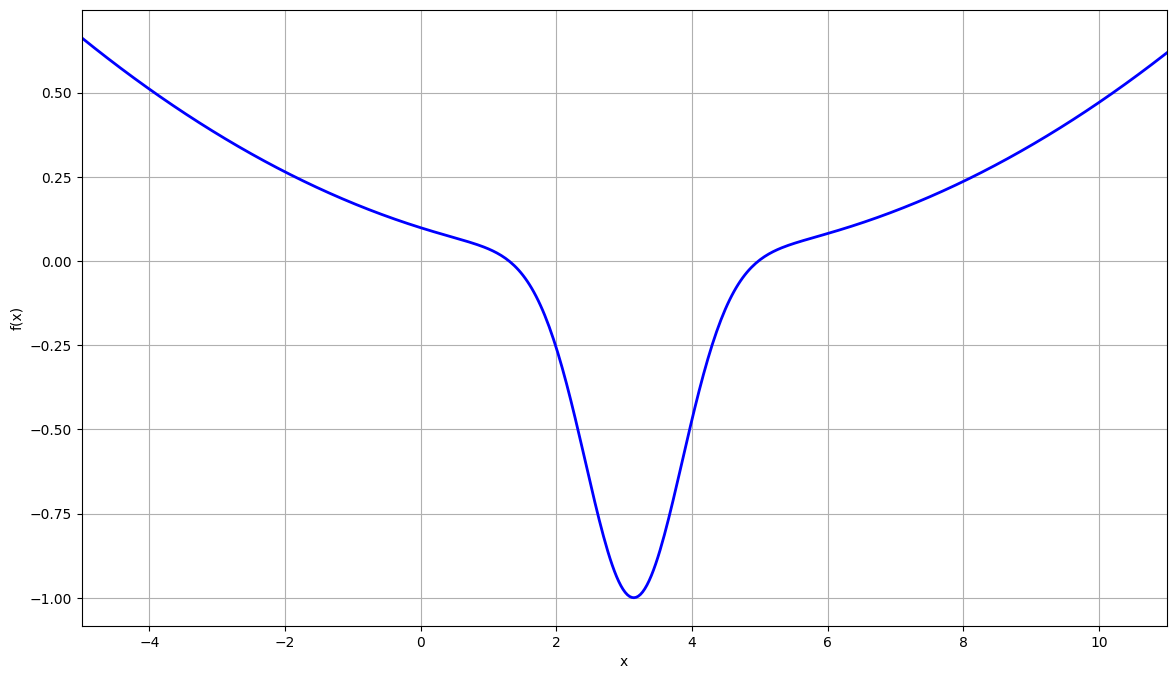

In [32]:
# 1. Plotting the function


def f_numpy(x):
  return -np.exp(-(x - np.pi)**2) + 0.01 * (x - np.pi)**2

plt.figure(figsize=(14, 8))
x_plot = np.linspace(-5, 11, 500)
y_plot = f_numpy(x_plot)

plt.plot(x_plot, y_plot, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.xlim(-5, 11) # Setting x-axis as required

  Final x for eta=1.0: 3.241847
  Final x for eta=0.1: 3.141592
  Final x for eta=0.01: 0.593182


(-5.0, 11.0)

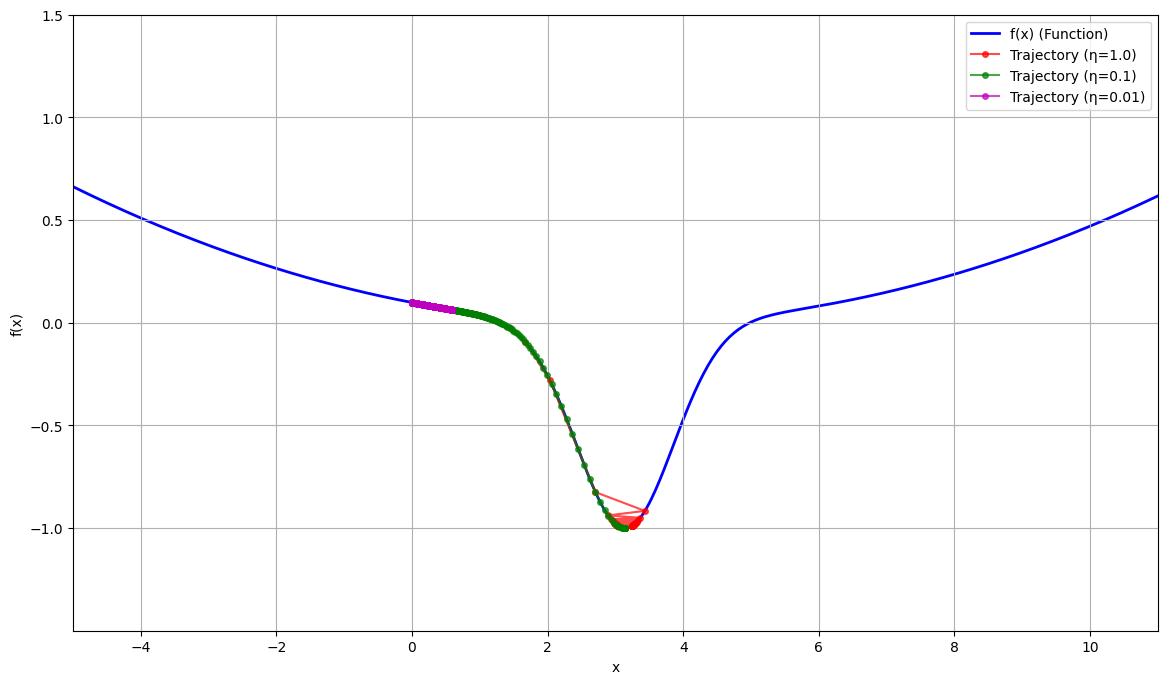

In [33]:
#2. Finding minimum and track trajectories


def f_numpy(x):
  return -np.exp(-(x - np.pi)**2) + 0.01 * (x - np.pi)**2

def f_torch(x):
  return -torch.exp(-(x - np.pi)**2) + 0.01 * (x - np.pi)**2

start_x = 0.0
num_steps = 1000
etas_to_test = [1.0, 0.1, 0.01]
colors = {1.0: 'r', 0.1: 'g', 0.01: 'm'}


plt.figure(figsize=(14, 8))
x_plot = np.linspace(-5, 11, 500)
y_plot = f_numpy(x_plot)
plt.plot(x_plot, y_plot, 'b-', label='f(x) (Function)', zorder=1, linewidth=2)


for eta in etas_to_test:
  x = torch.tensor(start_x, requires_grad=True)

  trajectory_x = []
  trajectory_y = []

  for _ in range(num_steps):
    fx = f_torch(x)
    x_np = x.detach().numpy()
    x_np = float(x_np)
    trajectory_x.append(x_np)

    f_value_np = fx.detach().numpy()
    trajectory_y.append(float(f_value_np))
    fx.backward()

    with torch.no_grad():
      x -= eta * x.grad

    x.grad.zero_()

  trajectory_x.append(float(x.detach().numpy()))
  trajectory_y.append(float(f_torch(x).detach().numpy()))

  print(f"  Final x for eta={eta}: {x.item():.6f}")

  plt.plot(trajectory_x, trajectory_y, 'o-',
           label=f'Trajectory (η={eta})',
           alpha=0.7, markersize=4, color=colors[eta], zorder=2)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(min(y_plot) - 0.5, 1.5)
plt.xlim(-5, 11)

**Exercise D.2: PyTorch Gradient Descent - two variables**

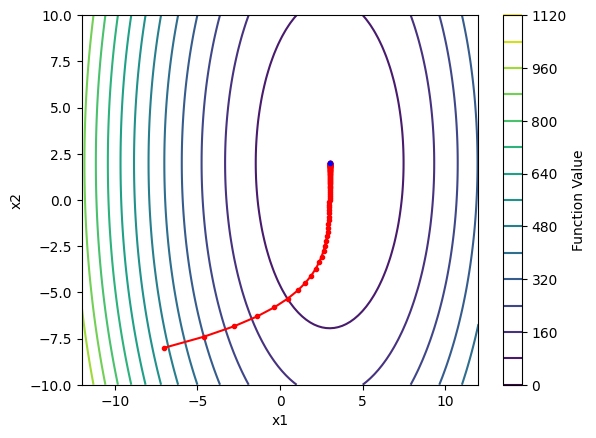

In [34]:

def f_float(x1, x2):
  return (2*(x1-3))**2 + (x2-2)**2

def f_torch(x):
  x1 = x[0]
  x2 = x[1]
  return torch.pow(2*(x1-3), 2) + torch.pow(x2-2, 2)

#Set up the Gradient Descent
x_start = np.asarray([-7.0, -8.0])
x = torch.tensor(x_start, requires_grad=True, dtype=torch.float32)

n_max = 100
trajectory_x1 = []
trajectory_x2 = []
trajectory_y = []
eta = 0.03

for n in range(n_max):

    x_np = x.detach().numpy()
    trajectory_x1.append(x_np[0])
    trajectory_x2.append(x_np[1])

    fx = f_torch(x)

    f_value_np = fx.detach().numpy()
    trajectory_y.append(f_value_np)

    fx.backward()

    with torch.no_grad():
        x -= eta * x.grad

    x.grad.zero_()

# Define a grid of x and y values
x_grid = np.linspace(-12, 12, 100)
y_grid = np.linspace(-10, 10, 100)
Z = np.empty([100, 100])

for j in range(100):
  for i in range(100):
    Z[j, i] = f_float(x_grid[i], y_grid[j])

# Create the contour plot
contour_plot = plt.contour(x_grid, y_grid, Z, levels=15, cmap='viridis')
plt.colorbar(contour_plot, label='Function Value')
plt.xlabel('x1')
plt.ylabel('x2')

# Overlay the trajectory on the contour plot
plt.plot(trajectory_x1, trajectory_x2, marker='.',
         linestyle='-', color='red', label='Trajectory')

plt.plot(3, 2, marker='.', linestyle='-', color='blue', label='Optimum')
plt.show()


n = 0.03 which is the Cyan is performing the best. It takes a smooth, direct path towards the minimum and gets pretty close to it within the 100 steps taken.

**Exercise D.3: The Unavoidable Problem of Local Minima - one dimension**

(-10.0, 20.0)

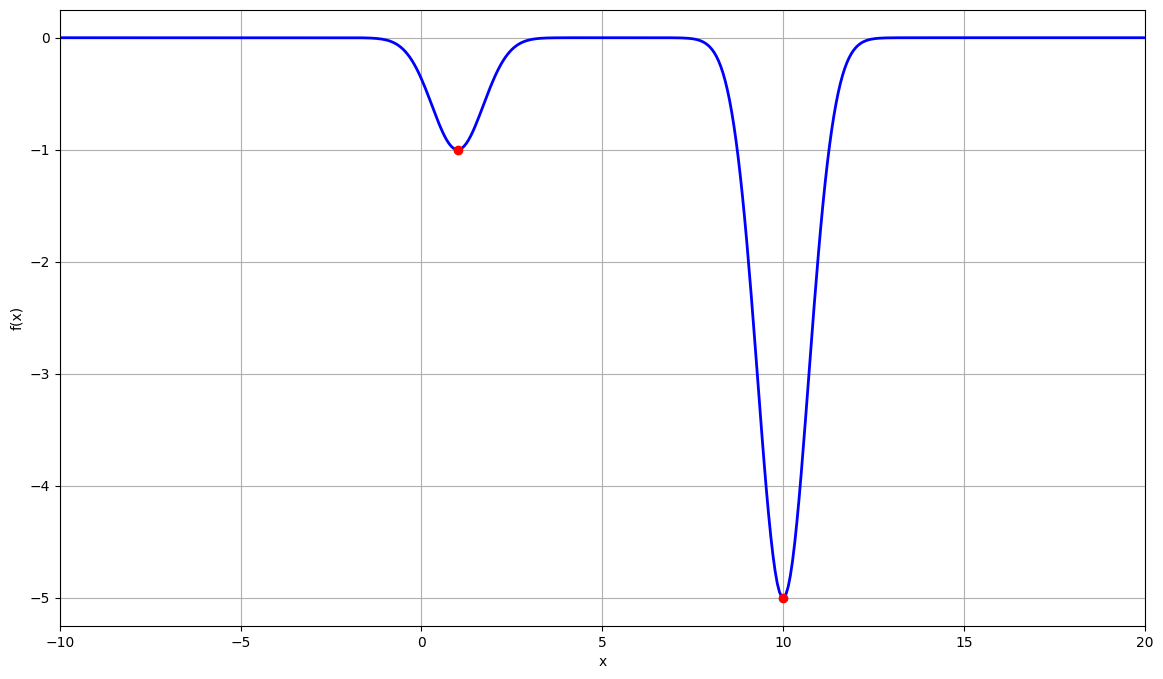

In [35]:

#a)

def f_numpy(x):
  return -np.exp(-(x - 1)**2) - 5 * np.exp(-(x - 10)**2)

x_plot = np.linspace(-10, 20, 500)
y_plot = f_numpy(x_plot)

plt.figure(figsize=(14, 8))
plt.plot(x_plot, y_plot, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(1, -1, 'ro')
plt.plot(10, -5, 'ro')
plt.grid(True)
plt.xlim(-10, 20)



*   The function has 2 minimum points, a local minimun at $x = 1$ and a global minimum at $x = 10$
*   Gradient Descent is a local algorithm that only follows the nearest downhill slope. If you start at the wrong point the algorithm can get stuck at the local minimum and think its finished, not knowing there is a global minimum.



In [36]:
#b)

def f_torch(x):
  return -torch.exp(-(x - 1)**2) - 5 * torch.exp(-(x - 10)**2)

def run_gradient_descent(start_x, eta, num_steps=1000):
  x = torch.tensor(float(start_x), requires_grad=True)

  trajectory_x = []
  trajectory_y = []

  for _ in range(num_steps):

    fx = f_torch(x)
    x_np = x.detach().numpy()
    f_value_np = fx.detach().numpy()

    trajectory_x.append(float(x_np))
    trajectory_y.append(float(f_value_np))

    fx.backward()

    with torch.no_grad():
      x -= eta * x.grad

    x.grad.zero_()

  trajectory_x.append(float(x.detach().numpy()))
  trajectory_y.append(float(f_torch(x).detach().numpy()))

  return trajectory_x, trajectory_y, x.item()

c) Based on the plot from (a) a good starting point whould be in the valley of the global minimum, for example $x_0 = 8.0$

(-10.0, 20.0)

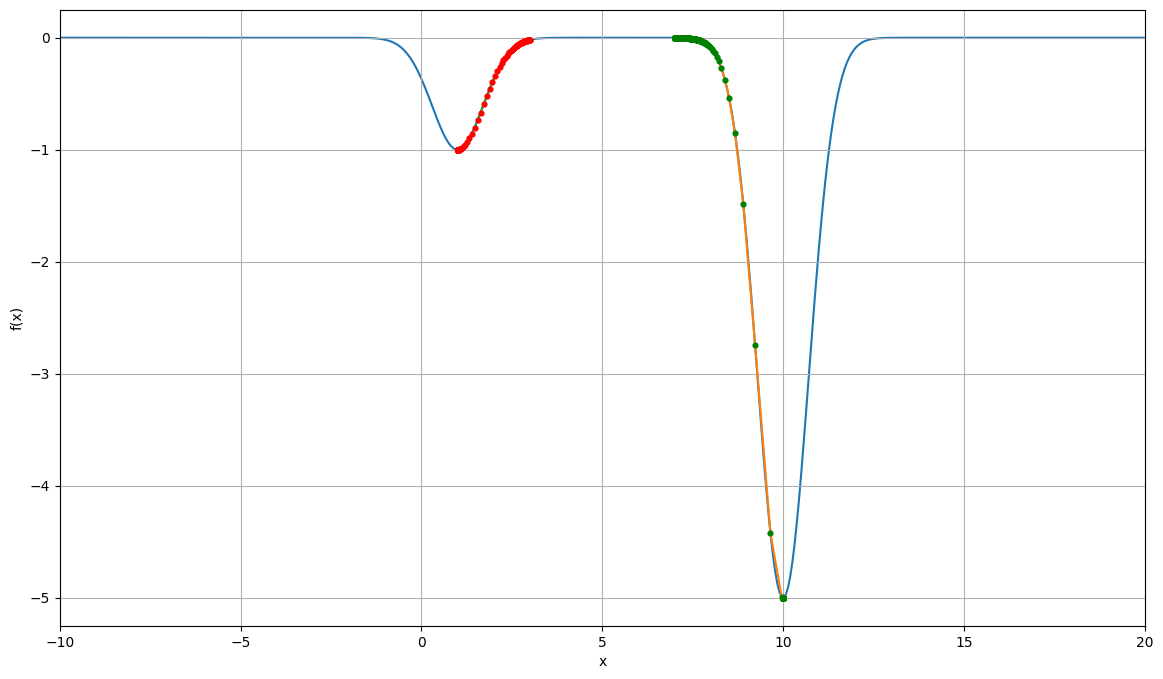

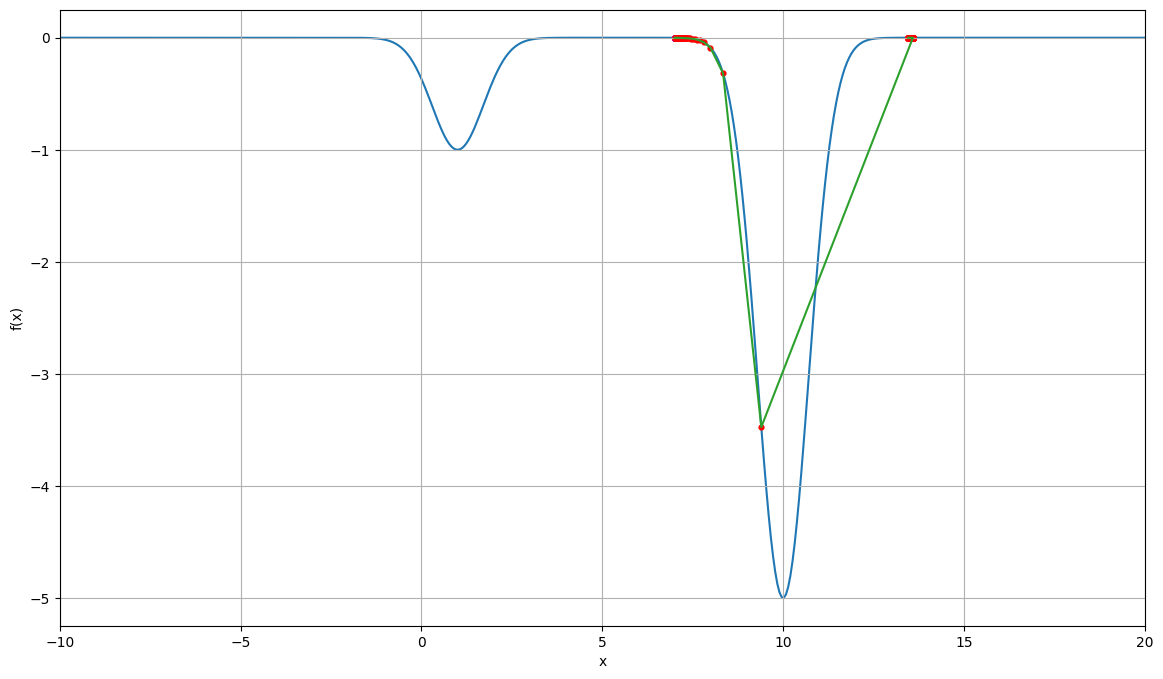

In [37]:

def f_torch(x):
  return -torch.exp(-(x - 1)**2) - 5 * torch.exp(-(x - 10)**2)

def f_numpy(x):
  return -np.exp(-(x - 1)**2) - 5 * np.exp(-(x - 10)**2)

def run_gradient_descent(start_x, eta, num_steps=1000):
  x = torch.tensor(float(start_x), requires_grad=True)
  trajectory_x = []
  trajectory_y = []

  for _ in range(num_steps):
    fx = f_torch(x)

    x_np = x.detach().numpy()
    f_value_np = fx.detach().numpy()

    trajectory_x.append(float(x_np))
    trajectory_y.append(float(f_value_np))

    fx.backward()
    with torch.no_grad():
      x -= eta * x.grad
    x.grad.zero_()

  trajectory_x.append(float(x.detach().numpy()))
  trajectory_y.append(float(f_torch(x).detach().numpy()))

  return trajectory_x, trajectory_y, x.item()

num_steps = 1000

#d) Run 1: Start x=7.0, eta=0.1
traj_x_7, traj_y_7, final_x_7 = run_gradient_descent(start_x=7.0, eta=0.1, num_steps=num_steps)

#d) Run 2: Start x=3.0, eta=0.1
traj_x_3, traj_y_3, final_x_3 = run_gradient_descent(start_x=3.0, eta=0.1, num_steps=num_steps)

#e) Run 1: Start x=7.0, eta=0.01
traj_x_e1, traj_y_e1, final_x_e1 = run_gradient_descent(start_x=7.0, eta=0.01, num_steps=num_steps)

#e) Run 2: Start x=7.0, eta=1.0
traj_x_e2, traj_y_e2, final_x_e2 = run_gradient_descent(start_x=7.0, eta=1.0, num_steps=num_steps)

#Plot d)
x_plot = np.linspace(-10, 20, 500)
y_plot = f_numpy(x_plot)
plt.figure(figsize=(14, 8))
plt.plot(x_plot, y_plot, zorder=1)

# Plot Trajectory Start at 7.0
plt.plot(traj_x_7, traj_y_7, zorder=2)
plt.scatter(traj_x_7, traj_y_7, s=12, color='g', zorder=2)

# Plot Trajectory Start at 3.0
plt.plot(traj_x_3, traj_y_3, zorder=2)
plt.scatter(traj_x_3, traj_y_3, s=12, color='r', zorder=2)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.xlim(-10, 20)


#Plot e)
plt.figure(figsize=(14, 8))
plt.plot(x_plot, y_plot, zorder=1)

# Plot eta = 0.01
plt.plot(traj_x_e1, traj_y_e1, zorder=2)
plt.scatter(traj_x_e1, traj_y_e1, s=12, color='m')

# Plot eta = 1.0
plt.plot(traj_x_e2, traj_y_e2, zorder=2)
plt.scatter(traj_x_e2, traj_y_e2, s=12, color='r')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.xlim(-10, 20)


d)
*   When starting at 7.0 the algorithm ends up at the global minimum at $x = 10$.
*   When starting at 3.0 the algorithm follows the slope down to $x = 1$ where the algorithm gets trapped. So it dose not reach the global minimum in this case.



e)
The Gradient Descent did not work for any of the cases.
*   **0.01:** The step length is too small, causing the algorithm to move very slow. After 1000 steps its still far from the global minimum.
*   **1.0:** The step length is too large. The algorithm misses the global minimum.



# Task E: Optimal Can shape for the The Coca Koala Company

a) A minimization problem where the objective function is the total surface area A of a cylindrical can, subject to a fixed volume constraint of $355 \text{ cm}^3$, which we can solve using Gradient Descent.

b) Mathematical formulation:

1. Objective Function (Area): $A = 2\pi rh + 2\pi r^2$
2. Constraint (Volume): $V = h\pi r^2 = 355$

Then we simplify this from a two variable problem to a one variable problem:

We solve the 2nd equation for h: $h = \frac{355}{\pi r^2}$ and put it in the 1st equation: $A = 2\pi r \left( \frac{355}{\pi r^2} \right) + 2\pi r^2$

If we simplify the equation we get: $A = \frac{710}{r} + 2\pi r^2$

The goal is to find the r that minimizes the function $A(r)$. Once we find the radius we can find the optimal height h using: $h = \frac{355}{\pi (r)^2}$.



Optimal Radius (r): 3.7897348403930664 cm
Optimal Height (h):   7.867936235779612 cm
Optimal Surface Area:  277.58787365909893 cm^2
Current Surface Area:  323 cm^2
Material Saved per Can: 45.41212634090107 cm^2


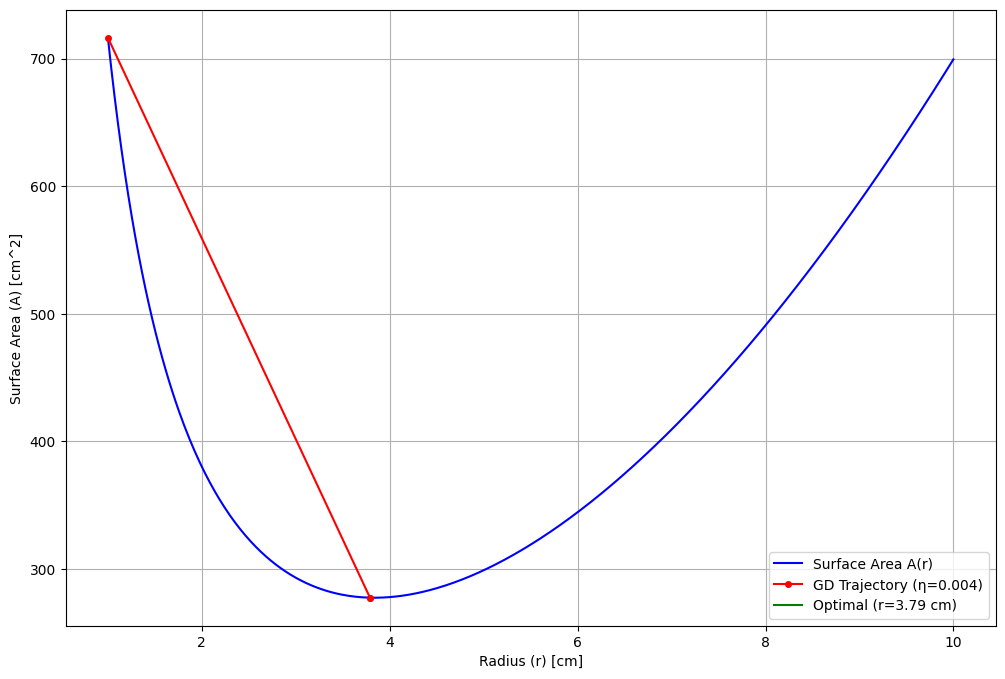

In [38]:

def f_torch(r):
  return 710 / r + 2 * torch.pi * torch.pow(r, 2)

def f_numpy(r):
  return 710 / r + 2 * np.pi * r**2

def run_gradient_descent(start_r, eta, num_steps=1000):
  r = torch.tensor(float(start_r), requires_grad=True)

  trajectory_r = []
  trajectory_a = []

  for i in range(num_steps):

    A = f_torch(r)

    trajectory_r.append(r.item())
    trajectory_a.append(A.item())

    if i > 0 and r.grad is not None and torch.abs(r.grad) < 1e-6:
      break

    A.backward()

    with torch.no_grad():
      r -= eta * r.grad

    r.grad.zero_()

  if i == num_steps - 1:
    print("Max iterations reached")

  trajectory_r.append(r.item())
  trajectory_a.append(f_torch(r).item())

  return trajectory_r, trajectory_a, r.item()

eta = 0.004
start_r = 1.0
num_steps = 100
traj_r, traj_a, optimal_r = run_gradient_descent(start_r, eta, num_steps)

#Final Dimensions
optimal_h = 355 / (np.pi * optimal_r**2)
optimal_area = f_numpy(optimal_r)
current_area = 323
savings = current_area - optimal_area

print(f"Optimal Radius (r): {optimal_r:} cm")
print(f"Optimal Height (h):   {optimal_h:} cm")
print(f"Optimal Surface Area:  {optimal_area:} cm^2")
print(f"Current Surface Area:  {current_area:} cm^2")
print(f"Material Saved per Can: {savings:} cm^2")

r_plot = np.linspace(1, 10, 500)
a_plot = f_numpy(r_plot)

plt.figure(figsize=(12, 8))
plt.plot(r_plot, a_plot, 'b-', label='Surface Area A(r)')
plt.plot(traj_r, traj_a, 'ro-', label=f'GD Trajectory (η={eta})', markersize=4)
plt.plot(optimal_r, optimal_area, 'g',
         label=f'Optimal (r={optimal_r:.2f} cm)', markersize=15, zorder=3)

plt.xlabel('Radius (r) [cm]')
plt.ylabel('Surface Area (A) [cm^2]')
plt.legend()
plt.grid(True)
plt.show()


*   The material saved per can after using gradient decsent is 45.41 $cm^2$


